<a href="https://colab.research.google.com/github/A-ManiMekhala/Computer_Vision/blob/main/Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load pretrained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 125MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [9]:
# Load an image
image_path = "person_walking.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")  #attach your image from downloads "person_walking".

In [5]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [6]:
# Transform image
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    output = model(image_tensor)

In [7]:
print(output)

[{'boxes': tensor([[340.2756, 152.5524, 461.1290, 492.7398],
        [496.3401, 190.8100, 527.9244, 284.2199],
        [715.3643, 182.1582, 770.4805, 302.3903],
        [ 76.0384, 205.0892, 123.6094, 298.9456],
        [332.7877, 195.2759, 357.3435, 276.0491],
        [604.0978, 190.0043, 633.9786, 271.5235],
        [573.0481, 200.4715, 596.6442, 264.0933],
        [648.1703, 179.9431, 679.8921, 258.8083],
        [410.4251, 263.2700, 426.4271, 273.8669],
        [311.5019, 190.7138, 336.9267, 264.5490],
        [346.0632, 156.6431, 361.7727, 178.3493],
        [671.0092, 183.2102, 701.7311, 219.0687],
        [270.4267, 198.4735, 294.0821, 290.3963],
        [133.4410, 210.5354, 172.7942, 294.9411],
        [539.2316, 198.4521, 555.1093, 250.4310],
        [169.2339, 212.0265, 202.8423, 291.0902],
        [561.5270, 164.5987, 571.9016, 180.1515],
        [352.4155, 206.9856, 380.5132, 334.1770],
        [238.4788, 208.9061, 265.4689, 287.1998],
        [708.4805, 184.2121, 729.8306, 

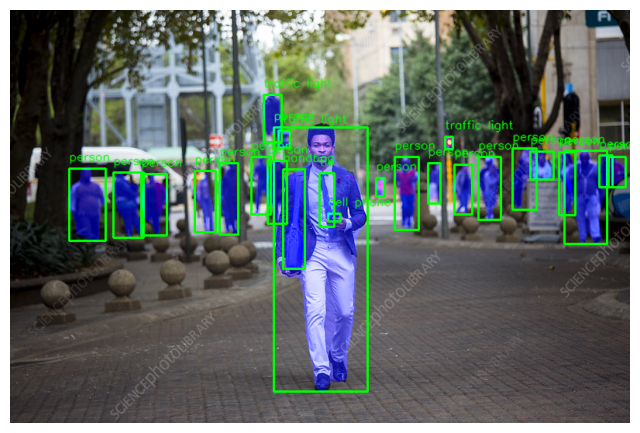

In [8]:
# Extract results (boxes, masks, scores)
boxes = output[0]["boxes"].cpu().numpy()
labels = output[0]["labels"].cpu().numpy()
masks = output[0]["masks"].cpu().numpy()
scores = output[0]["scores"].cpu().numpy()

# Filter based on confidence score
threshold = 0.6
selected_indices = scores > threshold
boxes = boxes[selected_indices]
masks = masks[selected_indices]

# Convert masks to binary
masks = (masks > 0.5).squeeze(axis=1)

# Convert image to numpy array
image_np = np.array(image)

# Draw results
for i in range(len(boxes)):
    # Draw bounding box
    x1, y1, x2, y2 = map(int, boxes[i])
    cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

    label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]

    # Put text on top of rectangle
    cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    # Overlay mask
    mask = masks[i].astype(np.uint8) * 255
    colored_mask = np.zeros_like(image_np)
    colored_mask[:, :, 2] = mask  # Red channel

    image_np = cv2.addWeighted(image_np, 1, colored_mask, 0.5, 0)

cv2.imwrite("output_img.png", cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))

# Show output
plt.figure(figsize=(8, 6))
plt.imshow(image_np)
plt.axis("off")
plt.show()